In [7]:
import numpy as np
import scipy.misc
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv('hasy-data-labels.csv')
df = df[df.symbol_id >= 70]
df = df[df.symbol_id <= 80]
data_vect = []
targets = []
for index, row in df.iterrows():
    img = scipy.misc.imread(row['path'], 1, 'L')
    img = img.flatten()
    data_vect.append(img)
    targets.append(row['latex'])
#split into train and test
training_data, test_data, train_target, test_target = train_test_split(data_vect, targets, train_size=0.8)
print('training_data size = ', len(training_data[0]))
print('test_data size = ', len(test_data[0]))
model = LogisticRegression()
ovr = OneVsRestClassifier(model).fit(training_data, train_target)
#fitting the data to a majority classifier
dummy = DummyClassifier('most_frequent')
dummy.fit(training_data, train_target)
#predicting & comparing
predictedOvr = ovr.predict(test_data)
predictedDummy = dummy.predict(test_data)
print('Real data')
print(np.asarray(test_target))
print('Majority classifier result')
print(predictedDummy)
print('Majority classifier accuracy:', accuracy_score(test_target,predictedDummy))
print('OVR predictor result')
print(predictedOvr)
print('OVR accuracy:', accuracy_score(test_target,predictedOvr))

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


training_data size =  1024
test_data size =  1024
Real data
['1' '9' '0' '8' '5' '3' '3' '7' '8' '8' '8' '7' '9' '9' '2' '2' '9' '5'
 '1' '6' '2' '0' '9' '7' '5' '2' '3' '2' '8' '6' '0' '0' '7' '0' '6' '1'
 '8' '2' '8' '9' '0' '2' '1' '2' '0' '3' '0' '1' '0' '6' '0' '6' '8' '6'
 '8' '9' '1' '4' '6' '7' '8' '9' '3' '1' '4' '0' '4' '3' '7' '2' '4' '0'
 '3' '3' '8' '9' '3' '0' '7' '3' '1' '5' '3' '0' '9' '2' '9' '9' '7' '8'
 '4' '4' '8' '4' '0' '2' '1' '1' '0' '0' '6' '2' '7' '3' '3' '0' '0' '1'
 '3' '1' '6' '1' '2' '1' '1' '5' '6' '9' '5' '0' '8' '9' '5' '0' '2' '9'
 '5' '1' '8' '8' '9' '9' '5' '2' '3' '3' '5' '8' '5' '4' '0' '3' '5' '1'
 '0' '7' '4' '0' '3' '8' '5' '8' '3' '3' '2' '0' '1' '1' '0' '2' '6' '0'
 '8' '1' '4' '0' '9' '2' '3' '8' '2' '2' '1' '4' '9' '6' '0' '0' '9' '1'
 '3' '9' '7' '5' '5' '3' '0' '1' '2' '0' '2' '5' '7' '6' '7' '4' '2' '6'
 '5' '8' '5' '1' '8' '1']
Majority classifier result
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0

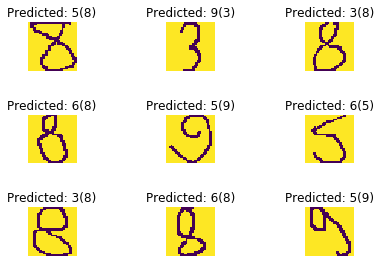

In [8]:
fig = plt.figure(9)
k = 331 #hardcoded subplot code to generate 3x3 subplots using the loop
for i in range(0, len(test_target)):
    if(test_target[i]!=predictedOvr[i]):
        im = test_data[i].reshape((32,32))
        ax = plt.subplot(k)
        ax.set_axis_off()
        ax.title.set_text("Predicted: "+predictedOvr[i]+"("+test_target[i]+")")
        plt.imshow(im)
        # again hardcoded so it breaks after we have eg 9 samples to show
        k+=1
        if(k>339):
            break
plt.tight_layout()
plt.show()